## Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [167]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import  zscore
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,RandomizedSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score,roc_curve

In [5]:
df =pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [56]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [14]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
df.shape

(1470, 35)

In [32]:
## finding all the columns with just single value

for i in df.columns:
    if df[i].value_counts().shape[0] == 1:
        print(i)

EmployeeCount
Over18
StandardHours


In [33]:
### dropping all columns with single value in all rows
df.drop(columns = ['EmployeeCount','Over18','StandardHours'],inplace=True)

In [35]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


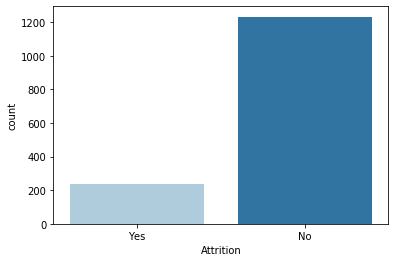

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(df['Attrition'],palette='Paired')

In [59]:
cat_features=[i for i in df.columns if df.dtypes[i]=='object' and i != 'Attrition']

In [60]:
cat_features

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

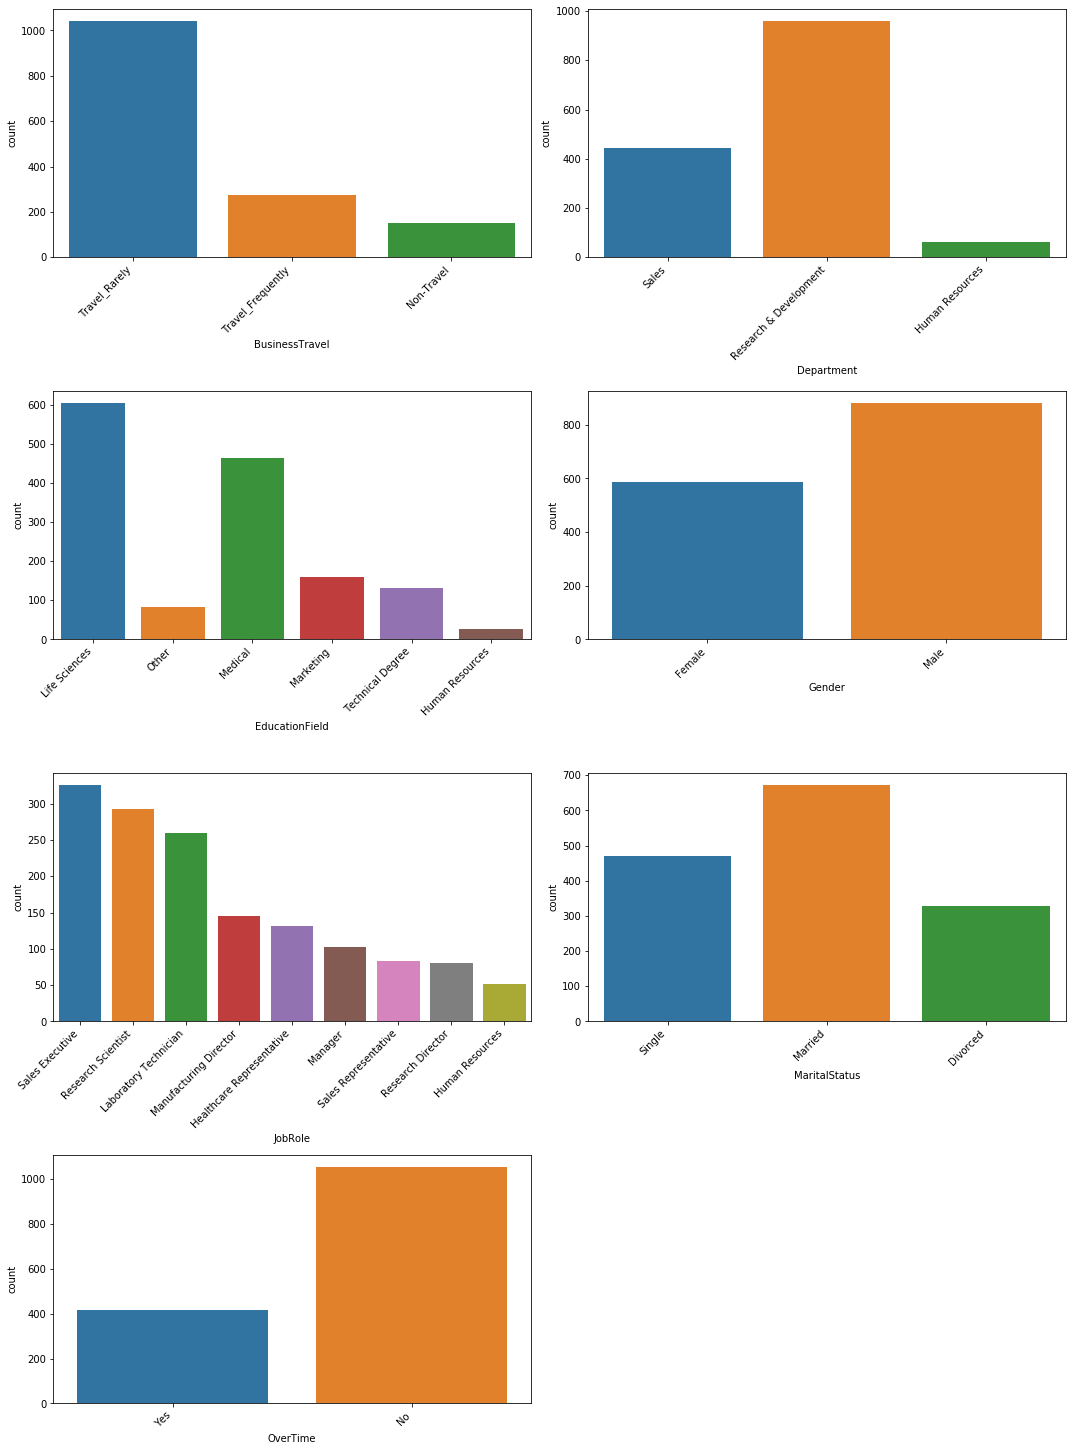

In [57]:
c = 1
plt.figure(figsize=(15,25))
for i in cat_features : 
   
    plt.subplot(5,2,c)
    c= c+1
    sns.countplot(df[i])
    plt.xticks( rotation=45, horizontalalignment='right')
    plt.xlabel(i)
    
    plt.tight_layout()

In [70]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)
len(newdf.columns)

24

In [75]:
continous_columns = []
non_continous = []
for i in newdf.columns:
    if newdf[i].value_counts().shape[0] > 7:
        continous_columns.append(i)
    else:
        non_continous.append(i)
        

In [76]:
continous_columns

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [77]:
non_continous

['Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']

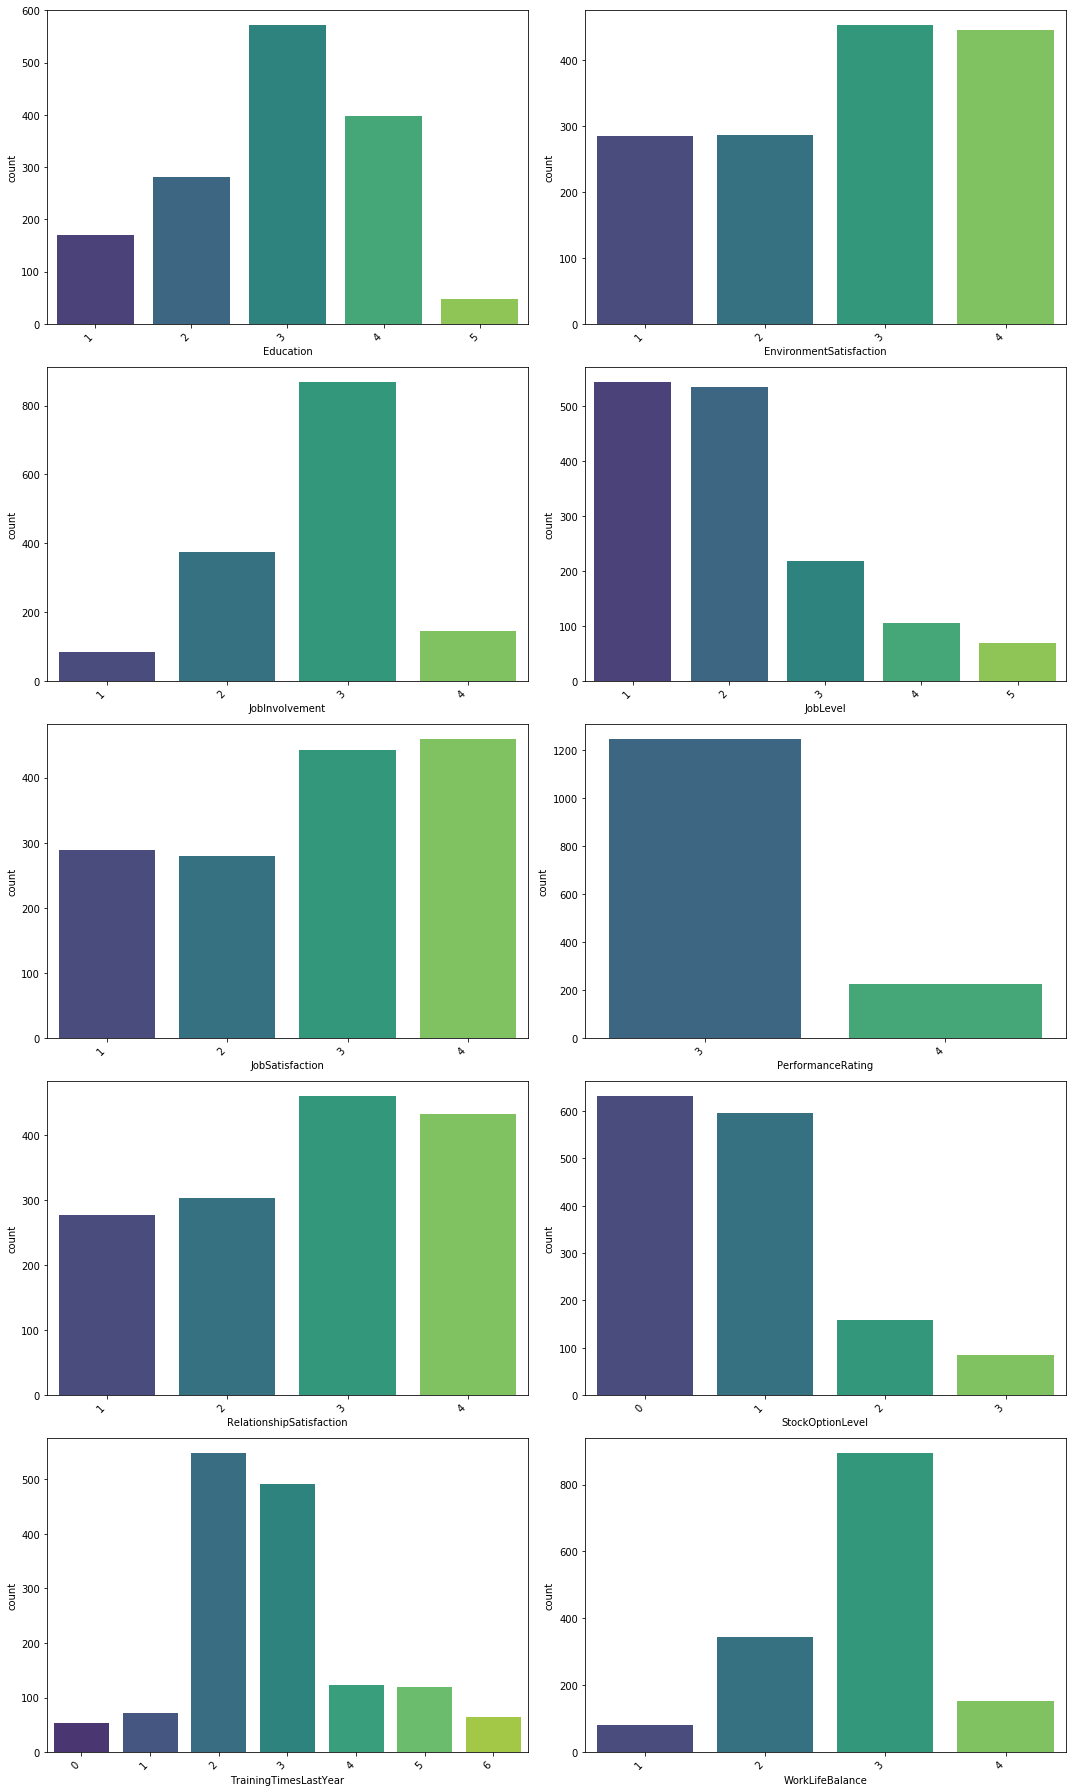

In [78]:
#3 visualizing non continous
c = 1
plt.figure(figsize=(15,25))
for i in  non_continous: 
   
    plt.subplot(5,2,c)
    c= c+1
    sns.countplot(df[i],palette='viridis')
    plt.xticks( rotation=45, horizontalalignment='right')
    plt.xlabel(i)
    
    plt.tight_layout()

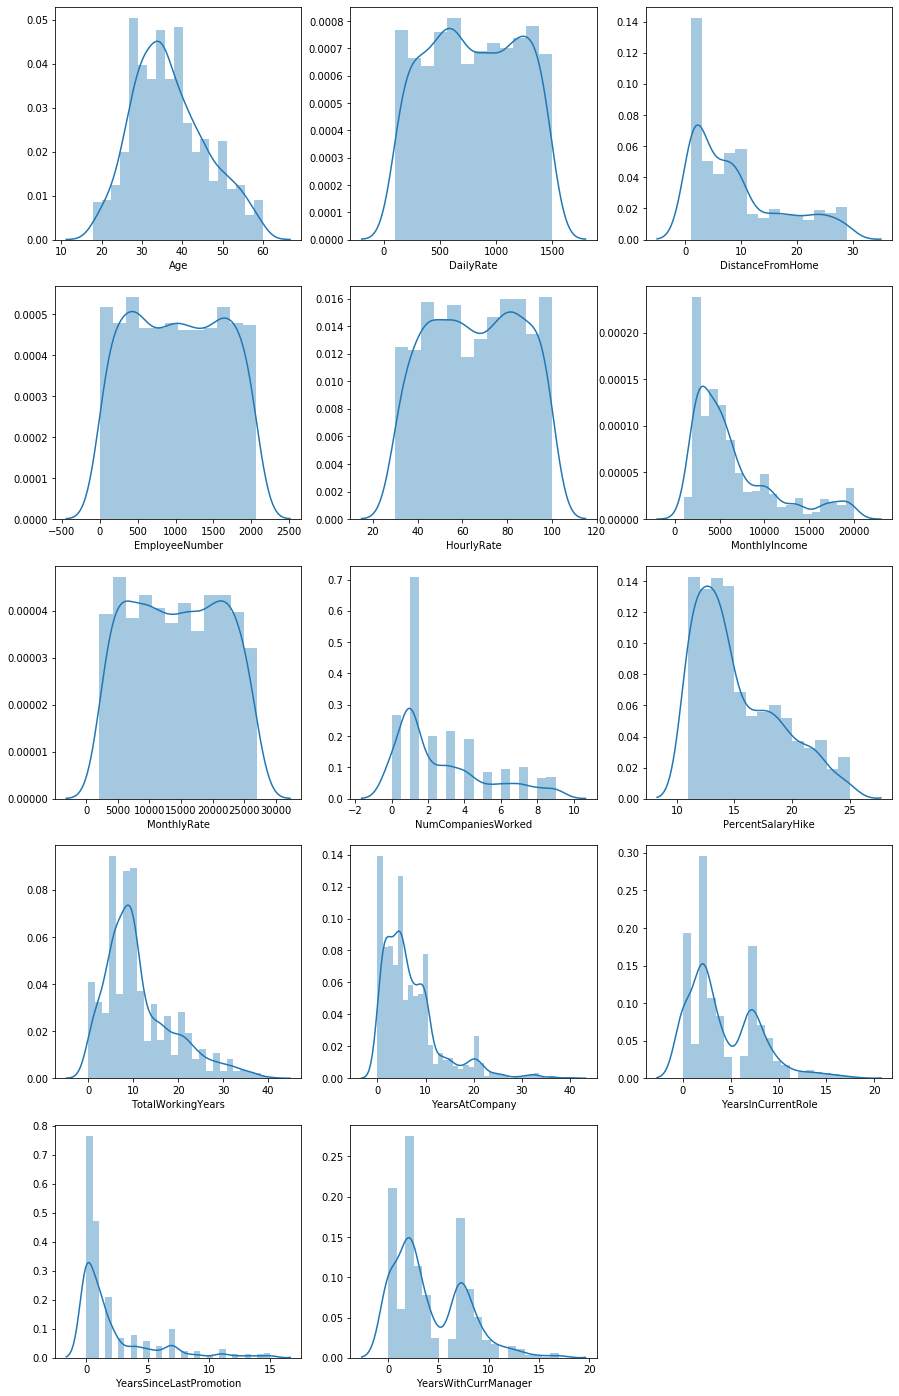

In [80]:
## visualizing continous data

plt.figure(figsize= (15,30))

for i in enumerate(continous_columns):
    plt.subplot(6,3,i[0] + 1)
    sns.distplot(df[i[1]])

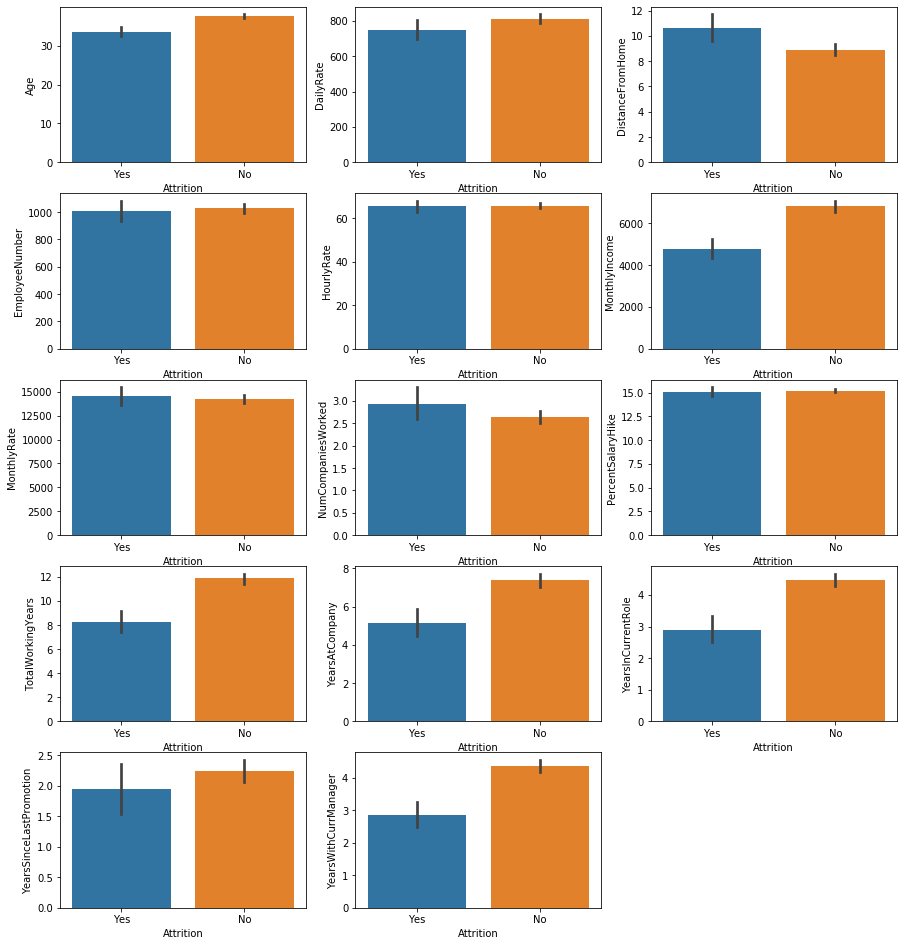

In [91]:
c = 1
plt.figure(figsize=(15,20))
for i in continous_columns:
    
    plt.subplot(6,3,c)
    c = c+1
    sns.barplot(df['Attrition'],df[i])

In [93]:
## Labelling the categorical columns

cat_features.append('Attrition')

In [94]:
cat_features

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime',
 'Attrition']

In [98]:
encoder = LabelEncoder()
for i in cat_features:
    df[i] = encoder.fit_transform(df[i])
    


In [99]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,2065,4,...,3,4,0,17,3,2,9,6,0,8


In [102]:
df[continous_columns].skew()

Age                        0.413286
DailyRate                 -0.003519
DistanceFromHome           0.958118
EmployeeNumber             0.016574
HourlyRate                -0.032311
MonthlyIncome              1.369817
MonthlyRate                0.018578
NumCompaniesWorked         1.026471
PercentSalaryHike          0.821128
TotalWorkingYears          1.117172
YearsAtCompany             1.764529
YearsInCurrentRole         0.917363
YearsSinceLastPromotion    1.984290
YearsWithCurrManager       0.833451
dtype: float64

In [111]:
len(df.columns)

32

### DATA CLEANING

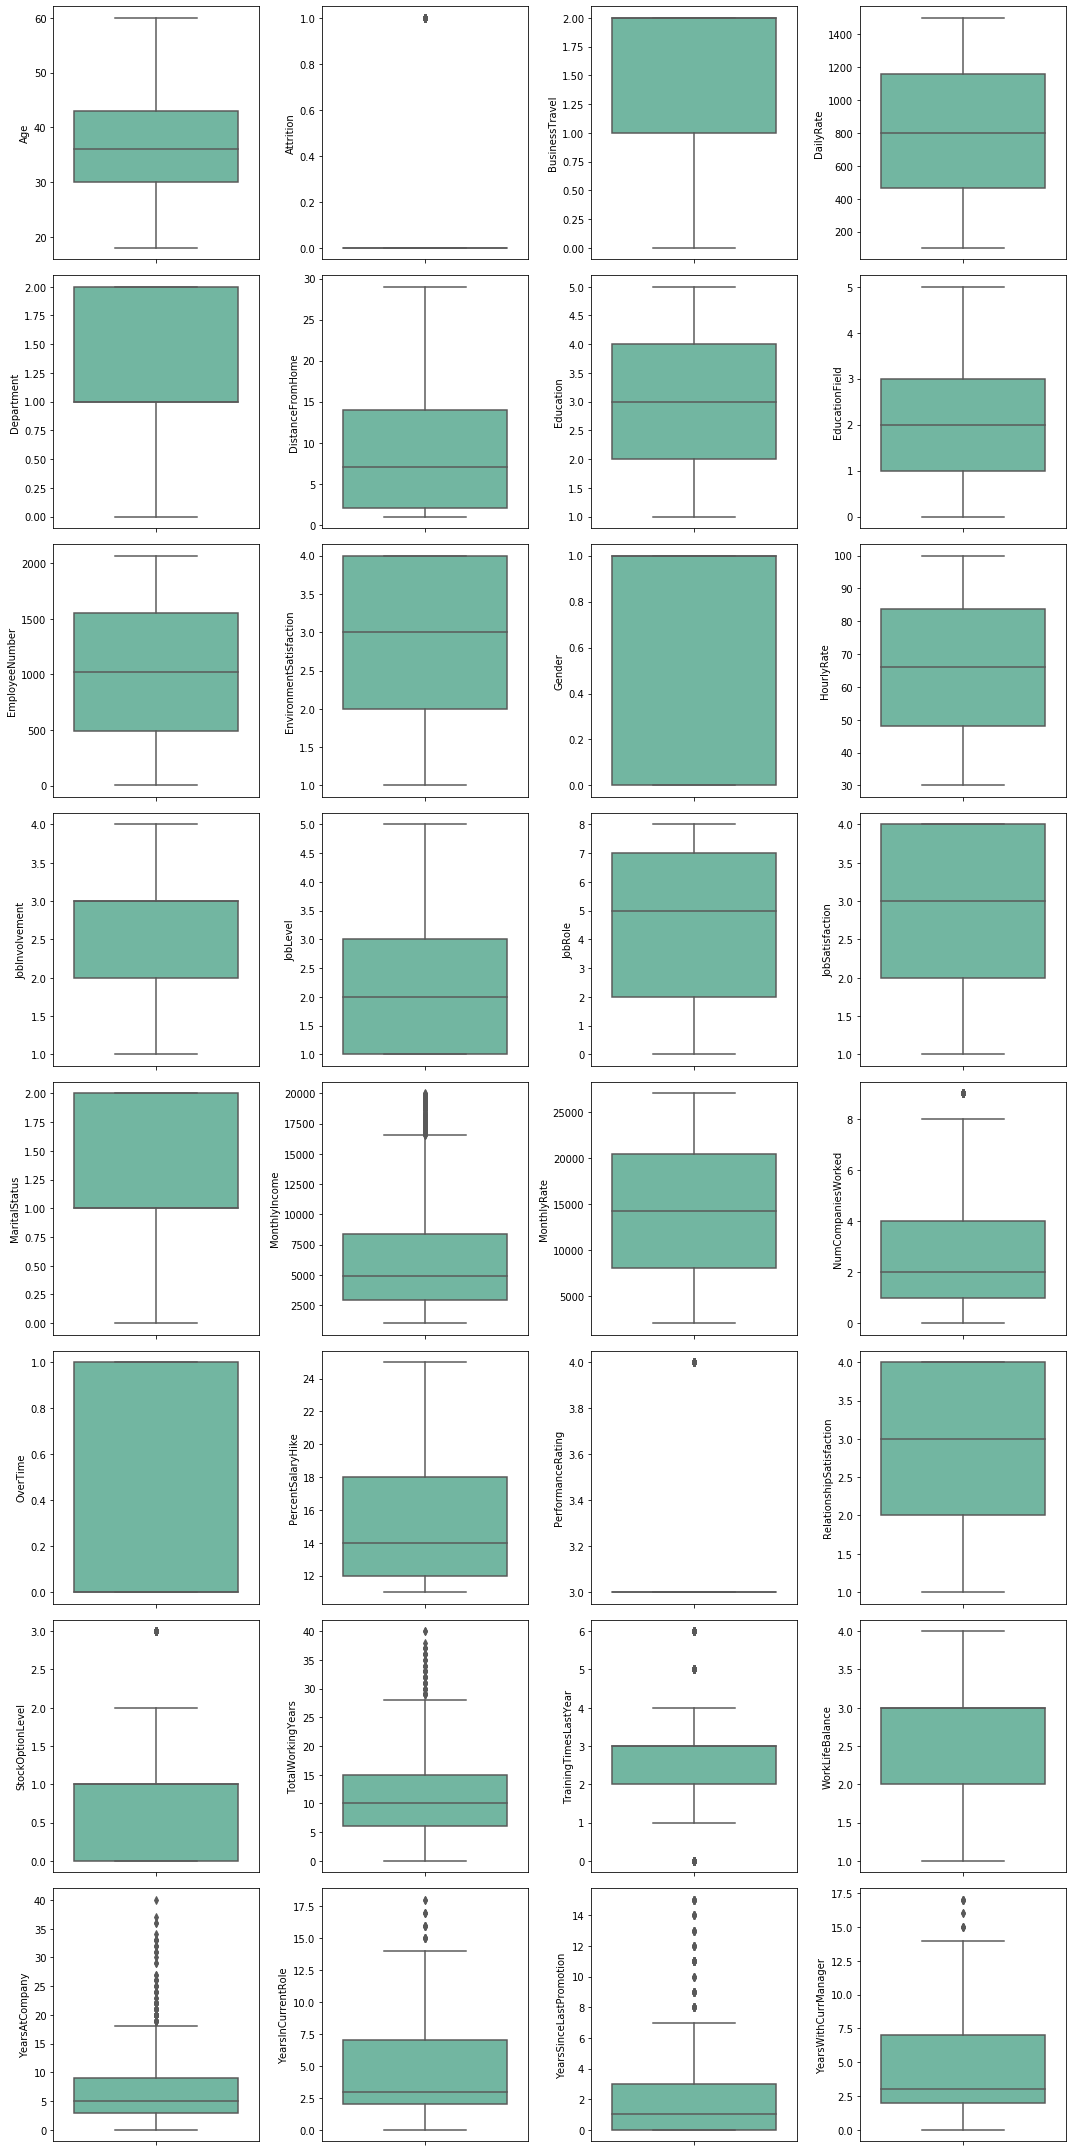

In [114]:
## box plot to check for outliers
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize= (15,30))


for i,el in enumerate(df._get_numeric_data().columns):
    plt.subplot(8,4,i + 1)
    sns.boxplot(y=el,data=df,palette='Set2')
                
                

plt.tight_layout() 

plt.show()

In [136]:
## Removing outliers using IQR
df1 = df.copy()
zscores = zscore(df1)
df1 = df1[(zscores<3).all(axis=1)]

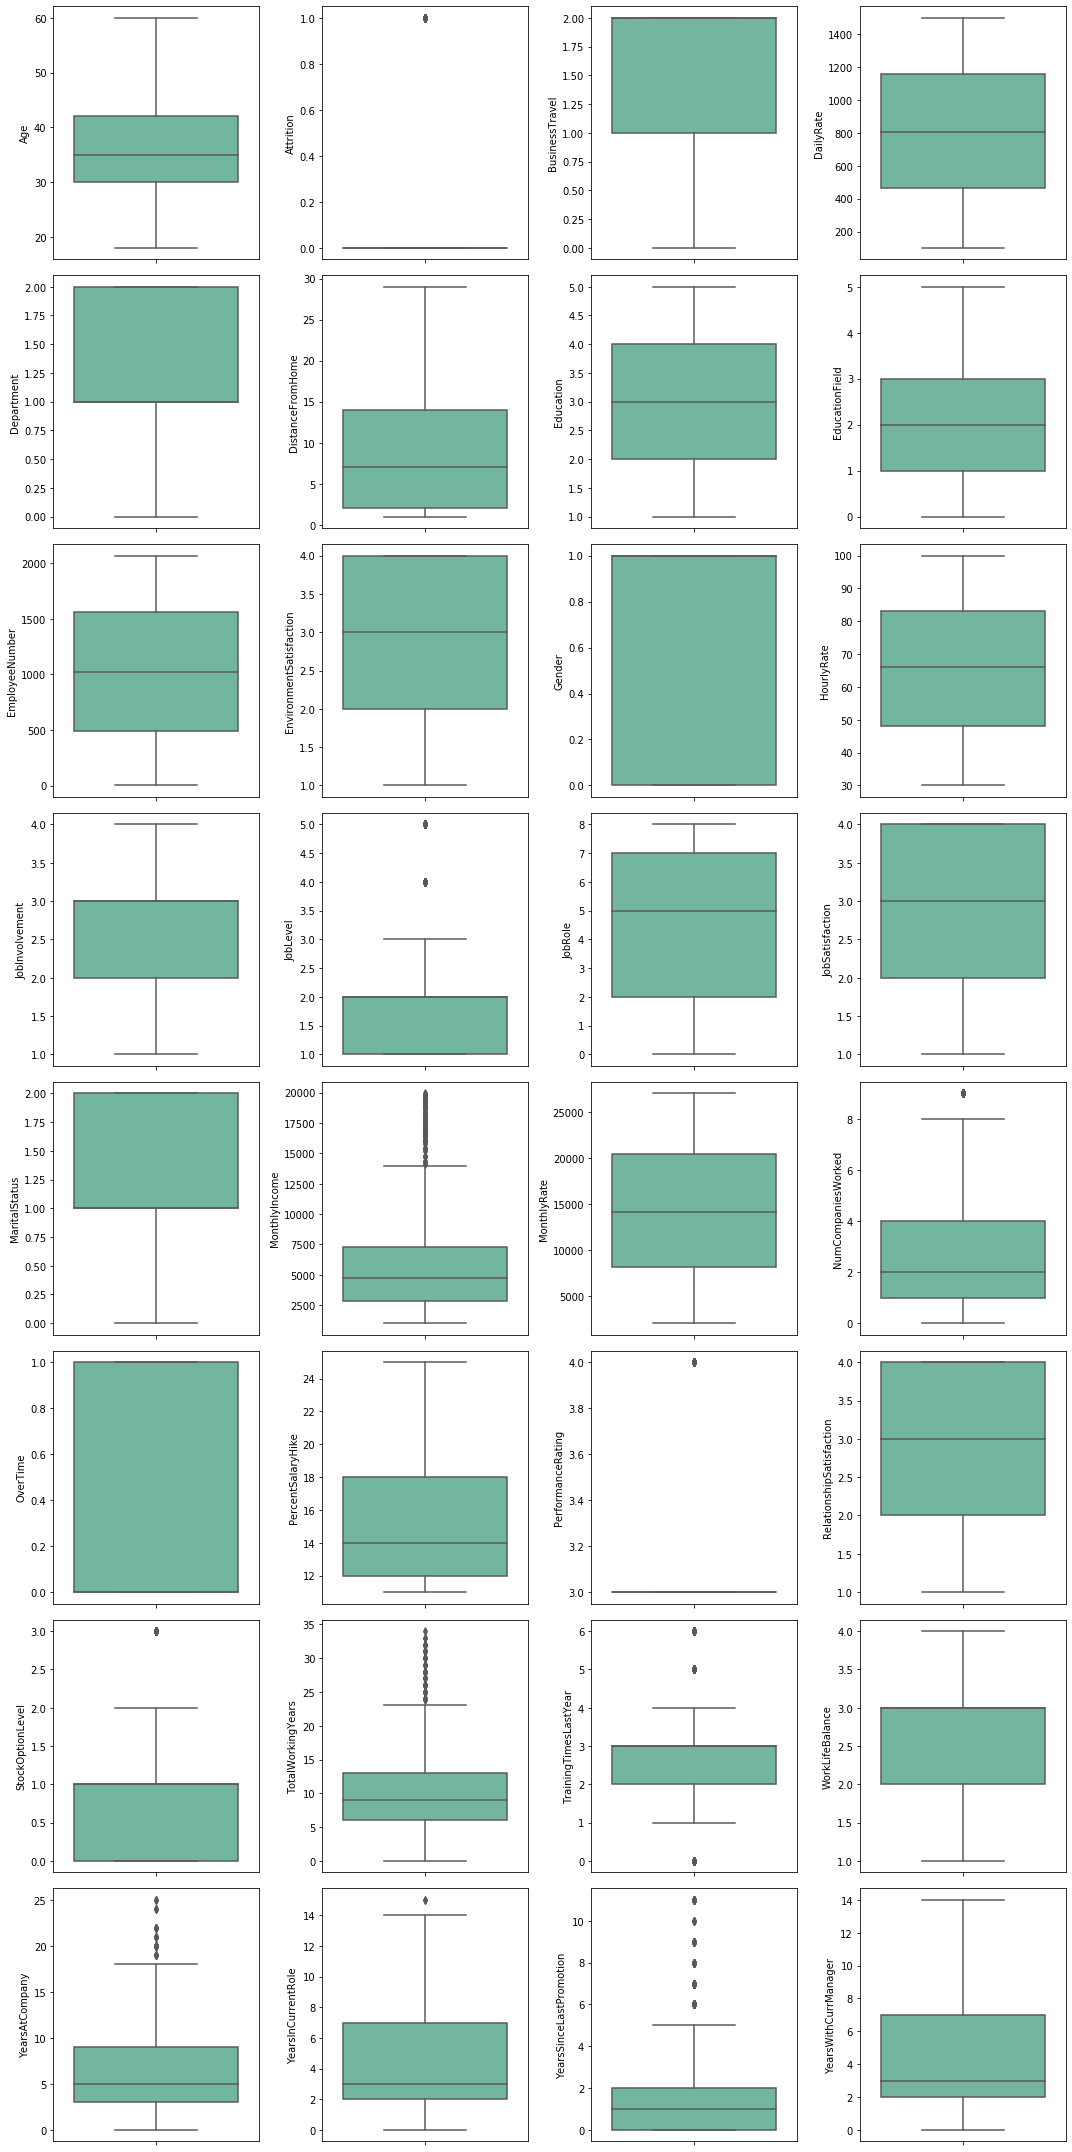

In [137]:
### after removing outliers

plt.figure(figsize= (15,30))


for i,el in enumerate(df1._get_numeric_data().columns):
    plt.subplot(8,4,i + 1)
    sns.boxplot(y=el,data=df1,palette='Set2')
                
                

plt.tight_layout() 

plt.show()

In [118]:
df[continous_columns].skew()

Age                        0.413286
DailyRate                 -0.003519
DistanceFromHome           0.958118
EmployeeNumber             0.016574
HourlyRate                -0.032311
MonthlyIncome              1.369817
MonthlyRate                0.018578
NumCompaniesWorked         1.026471
PercentSalaryHike          0.821128
TotalWorkingYears          1.117172
YearsAtCompany             1.764529
YearsInCurrentRole         0.917363
YearsSinceLastPromotion    1.984290
YearsWithCurrManager       0.833451
dtype: float64

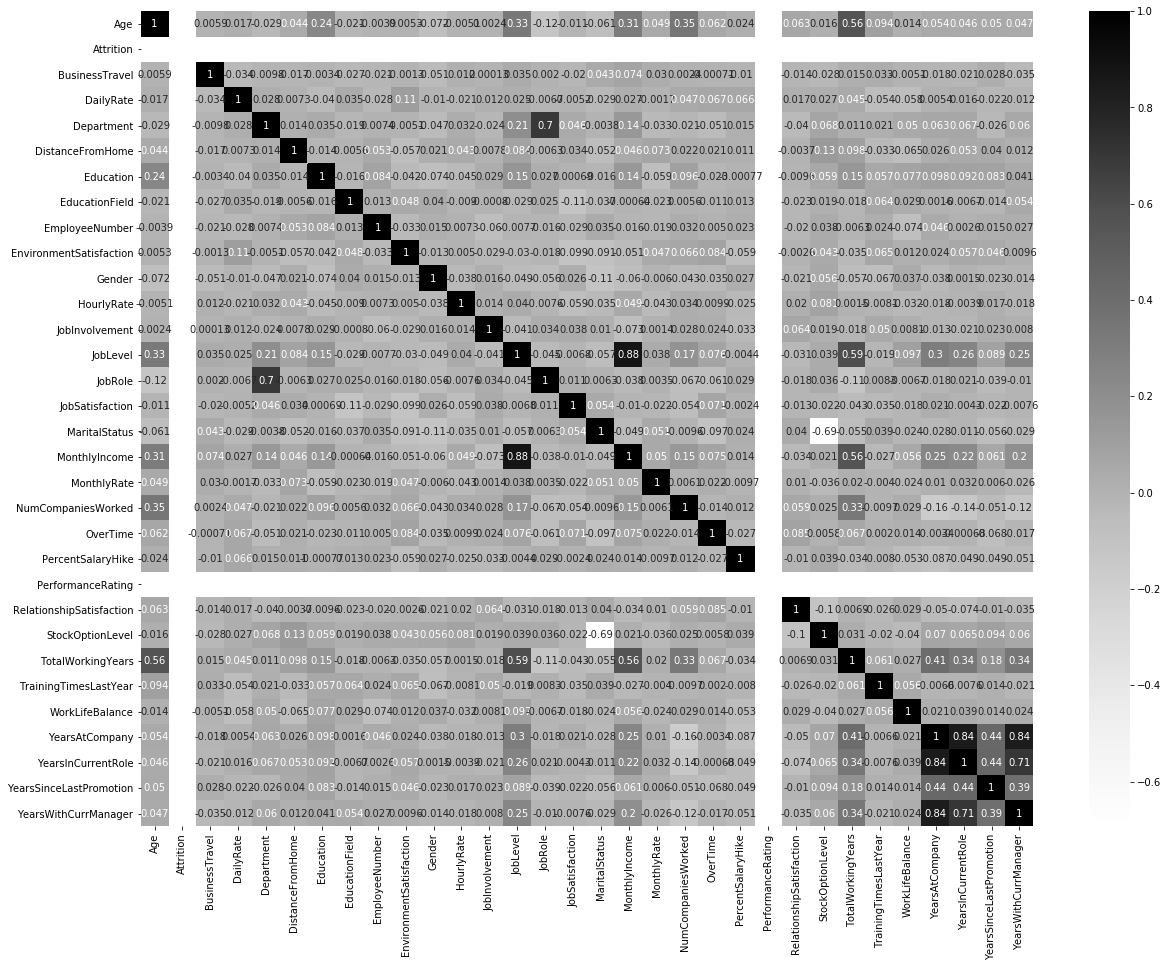

In [138]:

### checking the correlation

plt.rcParams['figure.figsize'] = (20, 15)
corr = df_new.corr()

sns.heatmap(corr,cmap='Greys' ,annot=True)

In [132]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
3,33,1,1392,1,3,4,1,5,4,0,...,3,3,0,8,3,3,8,7,3,0
5,32,1,1005,1,2,2,1,8,4,1,...,3,3,0,8,2,2,7,7,3,6
9,36,2,1299,1,27,3,3,13,3,1,...,3,2,2,17,3,2,7,7,7,7
11,29,2,153,1,15,2,1,15,4,0,...,3,4,0,10,3,3,9,5,0,8
12,31,2,670,1,26,1,1,16,1,1,...,3,4,1,5,1,2,5,2,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,0,325,1,5,3,3,2057,2,1,...,3,2,0,10,2,3,9,4,1,7
1464,26,2,1167,2,5,3,4,2060,4,0,...,3,4,0,5,2,3,4,2,0,0
1465,36,1,884,1,23,2,3,2061,3,1,...,3,3,1,17,3,3,5,2,0,3
1468,49,1,1023,2,2,3,3,2065,4,1,...,3,4,0,17,3,2,9,6,0,8


In [156]:
X = df1.drop(columns=['Attrition'])
y = df1['Attrition']

scale = StandardScaler()
scaled_data = scale.fit_transform(X)

In [158]:
df_scaled = pd.DataFrame(scaled_data,columns=df_new.drop(columns=['Attrition']).columns)

In [159]:
df_scaled

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.536681,0.593126,0.734325,1.405373,-1.011249,-0.876177,-0.940815,-1.702014,-0.665328,-1.229911,...,-0.424765,-1.575817,-0.929427,-0.343728,-2.171420,-2.501172,-0.022350,0.040903,-0.710699,0.368270
1,1.442111,-0.905354,-1.307769,-0.496337,-0.145521,-1.853858,-0.940815,-1.700354,0.251978,0.813067,...,2.354241,1.199034,0.238250,-0.045106,0.151871,0.336558,0.832812,0.965895,-0.310480,0.982200
2,0.083966,0.593126,1.406752,-0.496337,-0.887573,-0.876177,1.305159,-1.697034,1.169285,0.813067,...,-0.424765,-0.650866,-0.929427,-0.493039,0.151871,0.336558,-1.305094,-1.192419,-0.710699,-1.166556
3,-0.368749,-0.905354,1.453896,-0.496337,-0.763898,1.079185,-0.940815,-1.695374,1.169285,-1.229911,...,-0.424765,0.274084,-0.929427,-0.343728,0.151871,0.336558,0.405231,0.965895,0.489958,-1.166556
4,-1.047821,0.593126,-0.533609,-0.496337,-0.887573,-1.853858,0.556501,-1.692054,-1.582635,0.813067,...,-0.424765,1.199034,0.238250,-0.642351,0.151871,0.336558,-0.877513,-0.575758,0.089739,-0.552626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,-0.029213,-0.905354,0.193406,-0.496337,1.709609,-0.876177,0.556501,1.717604,0.251978,0.813067,...,-0.424765,0.274084,0.238250,1.000074,0.151871,0.336558,-0.236141,-0.575758,-0.710699,-0.245661
1383,0.310324,0.593126,-0.479021,-0.496337,-0.392872,-1.853858,0.556501,1.719264,1.169285,0.813067,...,-0.424765,-1.575817,0.238250,-0.194417,1.700732,0.336558,0.191440,0.965895,-0.310480,0.982200
1384,-1.047821,0.593126,-1.615447,-0.496337,-0.640223,0.101504,-0.940815,1.722584,-0.665328,0.813067,...,2.354241,-0.650866,0.238250,-0.642351,-2.171420,0.336558,-0.022350,-0.575758,-0.710699,-0.245661
1385,1.442111,-0.905354,0.538304,1.405373,-0.887573,0.101504,0.556501,1.724244,1.169285,0.813067,...,-0.424765,1.199034,-0.929427,1.000074,0.151871,-1.082307,0.619022,0.657565,-0.710699,1.289165


In [141]:
len(X)

1387

In [142]:
len(y)

1387

In [160]:
### using smote to balance the classes
X = df_scaled
y = df1['Attrition']


Counter(y)

oversample = SMOTE()
x_sm,y_sm = oversample.fit_resample(X,y)

Counter(y_sm)

Counter({1: 1158, 0: 1158})

In [161]:
x_sm

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.536681,0.593126,0.734325,1.405373,-1.011249,-0.876177,-0.940815,-1.702014,-0.665328,-1.229911,...,-0.424765,-1.575817,-0.929427,-0.343728,-2.171420,-2.501172,-0.022350,0.040903,-0.710699,0.368270
1,1.442111,-0.905354,-1.307769,-0.496337,-0.145521,-1.853858,-0.940815,-1.700354,0.251978,0.813067,...,2.354241,1.199034,0.238250,-0.045106,0.151871,0.336558,0.832812,0.965895,-0.310480,0.982200
2,0.083966,0.593126,1.406752,-0.496337,-0.887573,-0.876177,1.305159,-1.697034,1.169285,0.813067,...,-0.424765,-0.650866,-0.929427,-0.493039,0.151871,0.336558,-1.305094,-1.192419,-0.710699,-1.166556
3,-0.368749,-0.905354,1.453896,-0.496337,-0.763898,1.079185,-0.940815,-1.695374,1.169285,-1.229911,...,-0.424765,0.274084,-0.929427,-0.343728,0.151871,0.336558,0.405231,0.965895,0.489958,-1.166556
4,-1.047821,0.593126,-0.533609,-0.496337,-0.887573,-1.853858,0.556501,-1.692054,-1.582635,0.813067,...,-0.424765,1.199034,0.238250,-0.642351,0.151871,0.336558,-0.877513,-0.575758,0.089739,-0.552626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2311,-1.679497,-0.905354,0.383727,1.405373,0.631104,-0.853490,-0.557800,-0.150148,-0.217318,0.813067,...,-0.424765,1.199034,-0.929427,-1.465295,0.530101,0.336558,-1.200679,-1.192419,-0.515233,-1.166556
2312,-0.248241,0.242766,-0.986571,1.405373,2.175394,0.330095,-0.765772,1.345343,-0.176973,0.813067,...,-0.424765,0.982772,-0.929427,-0.045106,-0.260420,0.336558,0.832812,0.965895,1.435808,1.053971
2313,-0.831380,0.593126,-0.061110,-0.062562,-0.887573,1.079185,0.385734,0.062331,0.251978,0.813067,...,-0.424765,0.988056,-0.929427,-0.723547,0.151871,-1.082307,-0.877513,-0.575758,0.089739,-0.789573
2314,-0.276395,0.593126,-0.313456,1.405373,0.378534,-0.683249,0.556501,0.781688,-1.401621,0.409921,...,-0.424765,1.016512,1.636348,-0.551967,-0.469739,-0.802318,-0.835325,-0.575758,-0.068213,-0.552626


In [162]:

randomstate = 0
max_score = 0
lr = LogisticRegression()
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=.30,random_state=i)
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    score = accuracy_score(y_test,pred)    
    if(score>max_score):
        max_score = score
        randomstate  = i
print( 'Random State=',randomstate,' and R2 Score of MODEL : ',max_score)

Random State= 53  and R2 Score of MODEL :  0.818705035971223


In [164]:
x_train,x_test,y_train,y_test = train_test_split(x_sm, y_sm ,test_size=.30,random_state=53)

cv_Score 0.7800742799262397
roc_score 0.8740908262504762


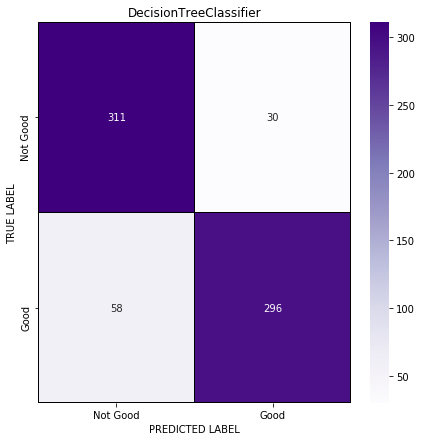

cv_Score 0.8709321351582993
roc_score 0.8183723511771623


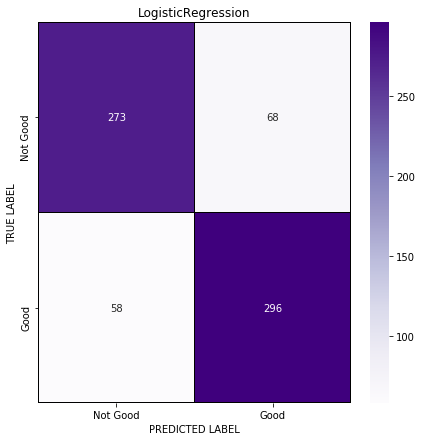

cv_Score 0.7966703893203128
roc_score 0.8638517487615356


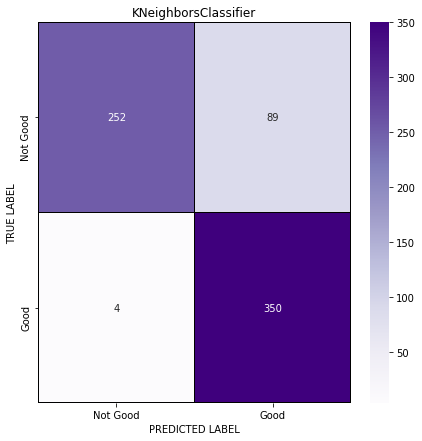

cv_Score 0.8594161493909566
roc_score 0.9134773100054674


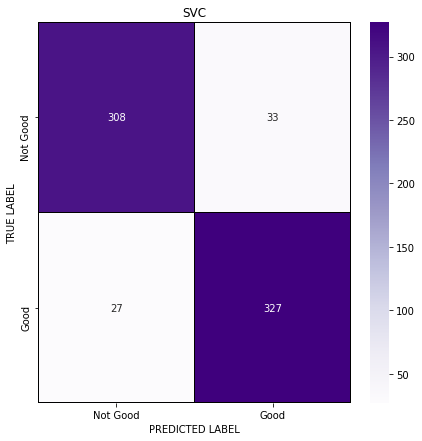

cv_Score 0.8558034438874891
roc_score 0.9516004771608927


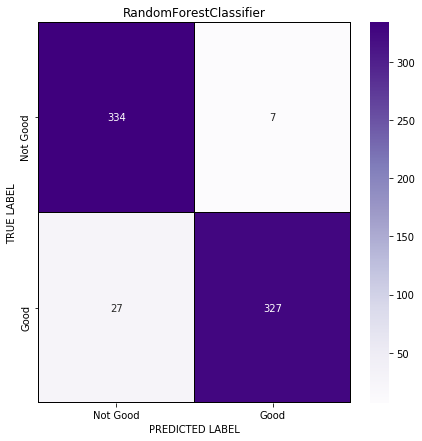

cv_Score 0.8471495727605642
roc_score 0.9340590155242972


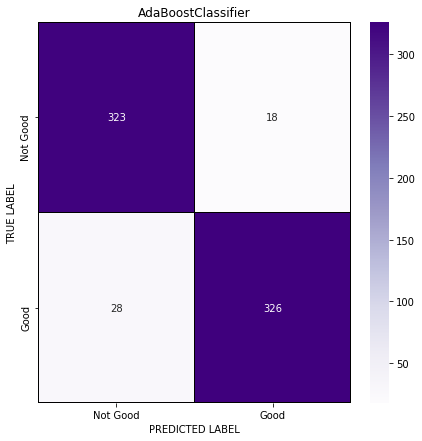

cv_Score 0.8608394151105108
roc_score 0.9460046059280613


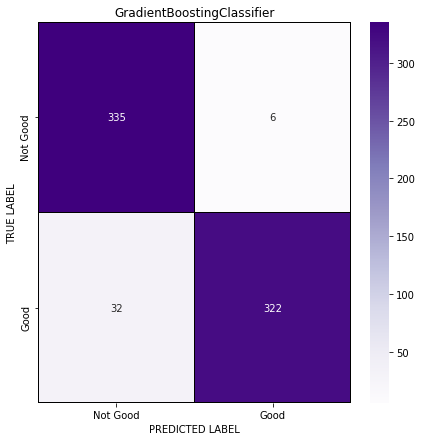

[23:18:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:18:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:18:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:18:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

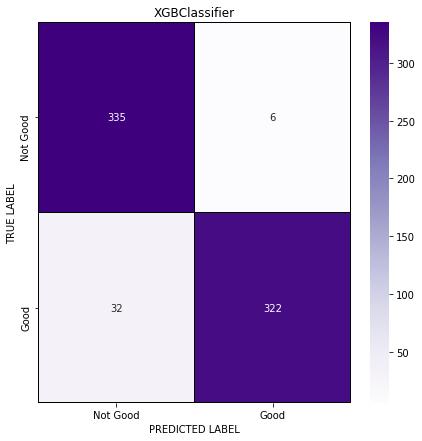

In [175]:
model_list = [
    DecisionTreeClassifier(),
    LogisticRegression(solver="lbfgs", max_iter=500),
    KNeighborsClassifier(n_neighbors=1),
    SVC(random_state=42, gamma="auto"),
    RandomForestClassifier(n_estimators=100, random_state=42),
    AdaBoostClassifier(n_estimators=100),
    GradientBoostingClassifier(n_estimators=100),
    XGBClassifier()
]

index_list = ['DT','LR','KNN','SVC','NB','RF','ADB','GBC','XGB']

def best_fit_model(models,x_train,x_test,y_train,_y_test):
    accuracy_scores = []
    cv_scores= []
    roc_auc_scores = []
   
    for m in models:
        m.fit(x_train,y_train)
        y_pred = m.predict(x_test)
        accuracy_scores.append(accuracy_score(y_test,y_pred))
        print('cv_Score',(np.mean(cross_val_score(m,X,y,cv=5,scoring='accuracy'))))
        print('roc_score',roc_auc_score(y_test,y_pred))
        cm = confusion_matrix(y_test, y_pred)
        x_axis_labels = ["Not Good", "Good"]
        y_axis_labels = ["Not Good", "Good"]
        f, ax = plt.subplots(figsize =(7,7))
        sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)    
        plt.xlabel("PREDICTED LABEL")
        plt.ylabel("TRUE LABEL")
        plt.title(str(m).split('(')[0]);
        plt.show()
#     df = pd.DataFrame(list(zip(accuracy_scores,cv_scores,roc_auc_scores)),index=index_list,columns=['Accuracy','CV_Score','ROC_AUC_SCORE'])
#     df['Score_Diff'] = df['Accuracy'] - df['CV_Score']
    return df

best_df =best_fit_model(model_list,x_train,x_test,y_train,y_test)

In [176]:
### Hyper tuning the best performing model which is XGBClassifier


param_test2b = {
 'min_child_weight':[6,8,10,12]
}
gsearch = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=4,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2b, scoring='roc_auc',n_jobs=4, cv=5)
gsearch.fit(X,y)

[23:20:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=4, min_child_weight=2,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_method=

[23:20:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy score : 0.9482014388489208
[23:20:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:11] WARNING: C:/Users/Admin

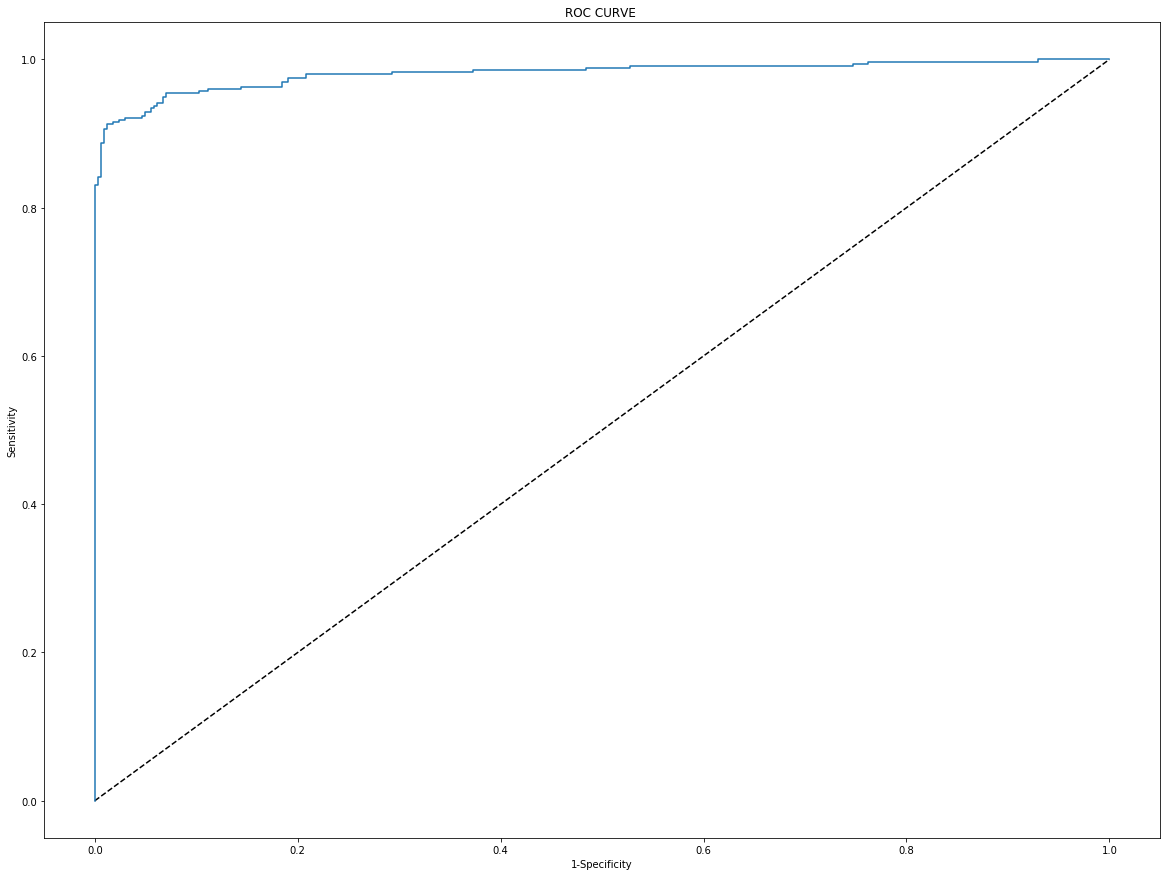

In [177]:
model = gsearch.best_estimator_

model.fit(x_train,y_train)
pred = model.predict(x_test)
print(f'accuracy score : {accuracy_score(y_test,pred)}')
print('Cross val score :',np.mean(cross_val_score(model,X,y,cv=5,scoring='accuracy')))


xgb_proba = model.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,xgb_proba)      
plt.plot([0,1],[0,1],'k--')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.plot(fpr,tpr)
plt.title('ROC CURVE ')
print('Roc_Auc_Score',roc_auc_score(y_test,pred))